In [5]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
import pickle

In [6]:
file = open('QuandlApiKey', 'r')
api_key = file.read()
file.close()
df = quandl.get("FMAC/HPI_TX", authtoken=api_key)

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][2:]

In [7]:
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    for abbre in states:
        query = 'FMAC/HPI_'+str(abbre)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbre)}, inplace=True)

        if main_df.empty:
            main_df=df
        else:
            main_df = main_df.join(df, how='left')
    print(main_df)

    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

                    AK          AZ          AR          CA          CO  \
Date                                                                     
1975-01-31   34.385997   28.940587   36.845816   15.696667   19.647452   
1975-02-28   34.910701   29.476038   37.185864   15.747528   19.875307   
1975-03-31   35.446987   29.980514   37.482491   15.936916   20.102116   
1975-04-30   36.002154   30.372962   37.722278   16.249400   20.315570   
1975-05-31   36.599658   30.577860   37.947634   16.509738   20.494853   
1975-06-30   37.228477   30.527373   38.181553   16.625954   20.651234   
1975-07-31   37.850604   30.201374   38.387207   16.750543   20.765025   
1975-08-31   38.416847   29.687453   38.516980   16.974333   20.773227   
1975-09-30   38.912039   29.152543   38.534432   17.216349   20.706608   
1975-10-31   39.365282   28.850928   38.496009   17.432255   20.688197   
1975-11-30   39.772512   28.957720   38.525691   17.576145   20.814759   
1975-12-31   40.113479   29.328103   3

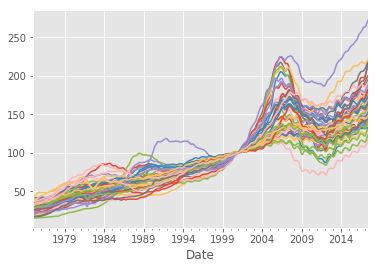

In [8]:
# Only need to run grap_initial_state_data() once
grab_initial_state_data()

# pickle_in = open('fiddy_states.pickle','rb')
# HPI_pickle_data = pickle.load(pickle_in)
# print(HPI_pickle_data)

HPI_data = pd.read_pickle('fiddy_states.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

In [9]:
# use pandas to show the correlation table of the HPI of each state

HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation.head())

          AK        AZ        AR        CA        CO        CT        DE  \
AK  1.000000  0.915354  0.969565  0.926211  0.959024  0.883156  0.938496   
AZ  0.915354  1.000000  0.939061  0.978110  0.922154  0.914206  0.948415   
AR  0.969565  0.939061  1.000000  0.947417  0.971687  0.942742  0.977692   
CA  0.926211  0.978110  0.947417  1.000000  0.941640  0.936078  0.965332   
CO  0.959024  0.922154  0.971687  0.941640  1.000000  0.875876  0.928024   

          FL        GA        HI    ...           SD        TN        TX  \
AK  0.906711  0.905903  0.949879    ...     0.976176  0.960667  0.976370   
AZ  0.994704  0.952002  0.922478    ...     0.912693  0.936337  0.900935   
AR  0.931161  0.969702  0.952623    ...     0.986480  0.994539  0.956985   
CA  0.986812  0.954412  0.955008    ...     0.935287  0.949201  0.922076   
CO  0.915181  0.955861  0.933078    ...     0.985982  0.981289  0.980236   

          UT        VT        VA        WA        WV        WI        WY  
AK  0.96545

In [ ]:
print(HPI_State_Correlation.describe().head())

In [ ]:
print(HPI_data.describe().head())